Number of numerical variables:  11
Number of discrete variables:  7
Number of continuous variables:  2


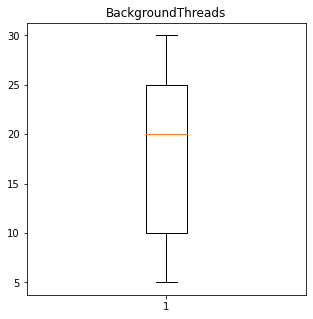

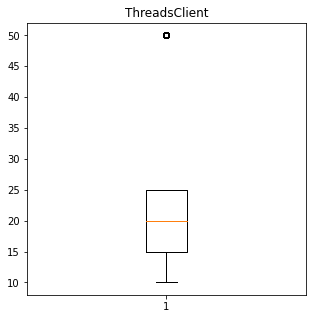

In [1]:
%run prepare_dataset.ipynb

In [2]:
from sklearn import metrics
import xgboost as xgb
import joblib

In [3]:
xgbModel = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=400)

In [4]:
evalset = [(X_train, y_train), (X_test, y_test)]

In [5]:
xgbModel.fit(X_train, y_train, eval_set=evalset ,  eval_metric=['mae', 'rmse'], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=32, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
y_pred = xgbModel.predict(X_test)

In [7]:
results = xgbModel.evals_result()

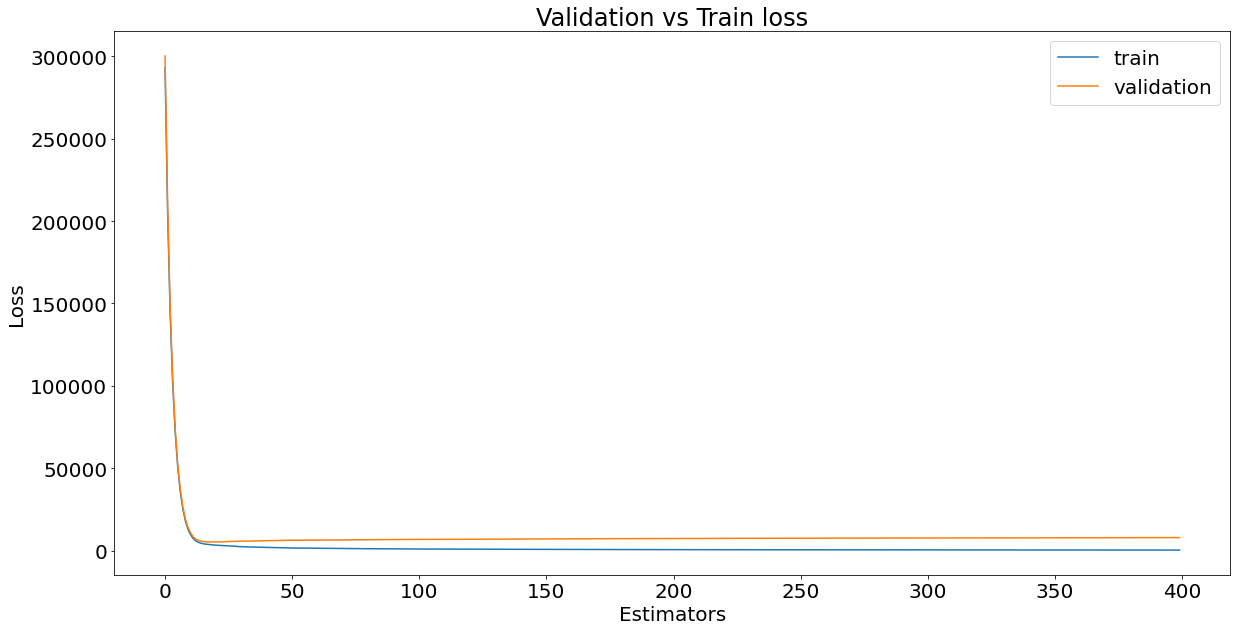

In [8]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
plt.plot(results['validation_0']['rmse'])
plt.plot(results['validation_1']['rmse'])
plt.title('Validation vs Train loss')
plt.ylabel('Loss')
plt.xlabel('Estimators')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
mae = metrics.mean_absolute_error(y_test, y_pred)
R2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f'MAE = {mae} \nRMSE = {np.sqrt(mse)} \nR2 = {R2} \nMAPE = {mape*100:.2f} %')

MAE = 3641.675954861111 
RMSE = 8009.598056643984 
R2 = 0.999055394974755 
MAPE = 1.35 %


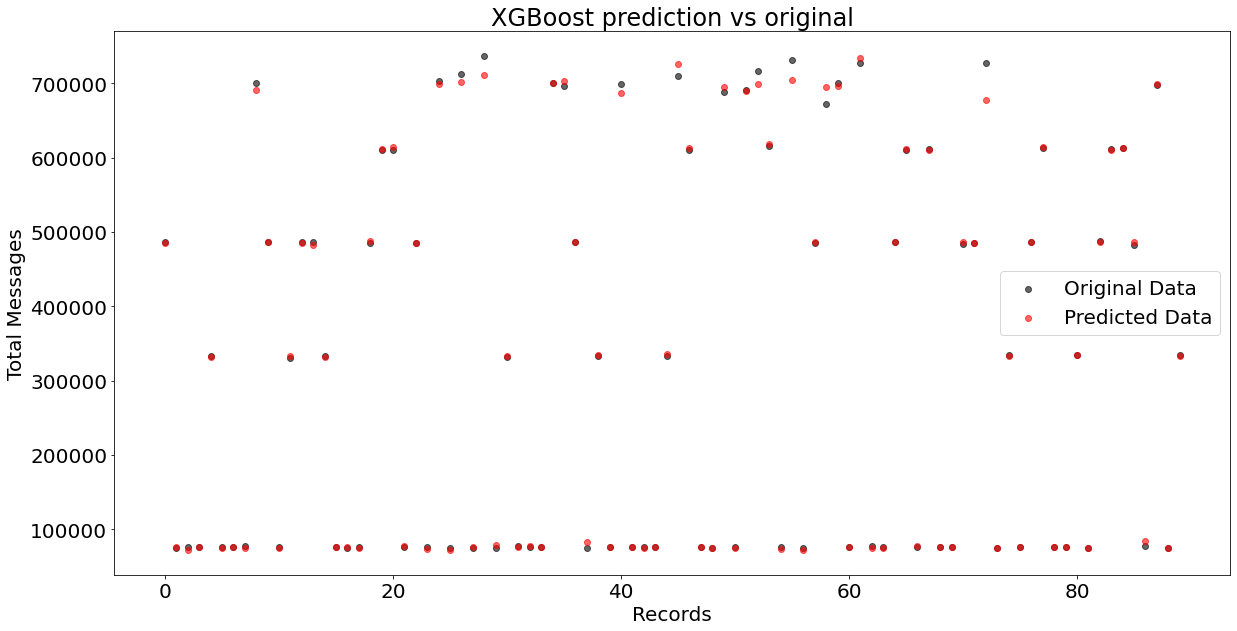

In [10]:
# Plot prediction vs original
plt.figure(figsize=(20,10))
plt.scatter(range(y_test.shape[0]),y_test,label="Original Data", alpha=0.6, c='black')
plt.scatter(range(y_pred.shape[0]),y_pred,label="Predicted Data", 
            alpha=0.6, c='red')
plt.ylabel('Total Messages')
plt.xlabel('Records')
plt.title('XGBoost prediction vs original')
plt.legend()
plt.show()

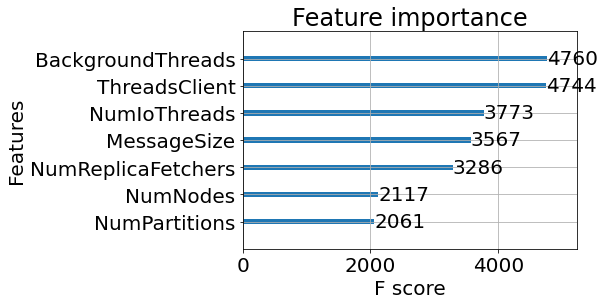

In [11]:
xgb.plot_importance(xgbModel);

In [12]:
joblib.dump(xgbModel, 'xgbModel.pkl') 

['xgbModel.pkl']